## MOT Python 프로그래밍 기말 고사<br>
### 24학번 석사과정 김영길 2024155760

[실습문제]<br>
"성동구립도서관 장서 대출목록 (2023년 11월)"과 "성동구립도서관 장서 대출목록 (2020년 11월)" 데이터를 비교하여 어떠한 변화가 있는지 <br>
아래와 같은 부분을 확인하면서 살펴보고 그 결과를 notebook에서 output으로 출력하여 파일을 제출한다.

1. 2020년 11월과 비교하여 2023년 11월 시점에서 추가된 도서의 목록 및 개수

2. 2020년 11월과 비교하여 2023년 11월 시점에서 없어진 도서의 목록 및 개수

3. 2020년 11월과 2023년 11월 가장 대출이 많이 발생한 도서 상위 20권의 리스트와 그 빈도수 비교

4. 2020년 11월과 2023년 11월 가장 대출이 많이 발생한 도서 상위 100권 중 동일한 도서의 리스트와 그 개수 (100권이 적당하지 않으면 숫자를 조정 가능)

5. 2020년 11월 가장 대출이 많이 발생한 도서 상위 50권의 당시 대출 횟수와 현재 대출 횟수 비교하여 증가한 도서와 감소한 도서 파악, 그래프로 표현

6. 위의 통계를 도출하면서 필요한 전처리 (중복 제거, 누락값 처리, 잘못된 값 처리 등)를 강의 내용을 참고하여 수행

7. 위의 통계 외에도 2020년과 2023년을 비교하기에 유의미하다고 여겨지는 분석을 각자 수행하고 그 결과물을 그래프로 표현. 결과에 대한 분석을 코드에 추가 (텍스트, 주석 등)

In [5]:
import numpy as np
import pandas as pd
import re

#### 도서 대출목록 데이터 조회

In [6]:
book_2020 = pd.read_excel('성동구립도서관 장서 대출목록 (2020년 11월).xlsx')
book_2023 = pd.read_excel('성동구립도서관 장서 대출목록 (2023년 11월).xlsx')

print( book_2020.shape )
print( book_2023.shape )

d:\python3.9\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
d:\python3.9\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


(225449, 13)
(228573, 13)


#### 0 데이터 준비 및 전처리

In [42]:
# 2020년과 2023년 대출 현황
print("2020년 도서 대출 : 전체", book_2020.shape[0],"권" )
print(" - ISBN :", len( book_2020['ISBN'].unique()) )
print(" - 도서명 :", len( book_2020['도서명'].unique()) )

print("2023년 도서 대출 : 전체", book_2023.shape[0],"권" )
print(" - ISBN :", len( book_2023['ISBN'].unique()) )
print(" - 도서명 :", len( book_2023['도서명'].unique()) )


2020년 도서 대출 : 전체 225449 권
 - ISBN : 185295
 - 도서명 : 186264
2023년 도서 대출 : 전체 228573 권
 - ISBN : 190286
 - 도서명 : 187705


#### 0.1 중복 제거
- 중복 판단 기준 : '도서명','저자','출판사','발행년도','ISBN','등록일자','대출건수'가 동일한 데이터 

In [93]:
# 중복 데이터
dup_check_cols = ['도서명','저자','출판사','발행년도','ISBN','등록일자','대출건수']
dup_rows_2020 = book_2020.duplicated(subset=dup_check_cols, keep='first')
print("2020 중복 건수 :", dup_rows_2020.sum())

dup_rows_2023 = book_2023.duplicated(subset=dup_check_cols, keep='first')
print("2023 중복 건수 :", dup_rows_2023.sum())

print('중복제거 전 :')
print( book_2020.shape )
print( book_2023.shape )

book_2020 = book_2020.drop_duplicates(subset=dup_check_cols, keep='first')
book_2023 = book_2023.drop_duplicates(subset=dup_check_cols, keep='first')

print('중복제거 후 :')
print( book_2020.shape )
print( book_2023.shape )

2020 중복 건수 : 0
2023 중복 건수 : 0
중복제거 전 :
(219171, 13)
(222875, 13)
중복제거 후 :
(219171, 13)
(222875, 13)


#### 0.2 결측값 확인
2020년, 2023년 모두 결측값 많은 변수는 출판사, 세트 ISBN,  부가기호, 권, 주제분류로 모두 1000건 이상<br>
-> 분석하는데 사용되지 않아서 그냥 놔둠


In [48]:
print("2020 결측값")
print(book_2020.isna().sum())

print("2023 결측값")
book_2023.isna().sum()


2020 결측값
번호              0
도서명             0
저자             91
출판사          4205
발행년도          121
ISBN            0
세트 ISBN    173177
부가기호        20303
권          216499
주제분류번호       1242
도서권수            0
대출건수            0
등록일자            0
dtype: int64
2023 결측값


번호              0
도서명             0
저자             52
출판사          4025
발행년도           85
ISBN            0
세트 ISBN    209743
부가기호        22088
권          216089
주제분류번호       1242
도서권수            0
대출건수            0
등록일자            0
dtype: int64

#### 1. 2020년 11월과 비교하여 2023년 11월 시점에서 추가된 도서의 목록 및 개수

In [49]:
print("도서명을 기준으로")
print("- 추가된 도서 개수 :",book_2023[~book_2023['도서명'].isin(book_2020['도서명'].unique().tolist() )].shape[0] )
print("- 추가된 도서 목록 :")
book_2023[~book_2023['도서명'].isin(book_2020['도서명'].unique().tolist() )]


도서명을 기준으로
- 추가된 도서 개수 : 34262
- 추가된 도서 목록 :


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,Hyperculture,Han Byung-Chul;Steuer Daniel,Polity Press,2022,9781509546176,NaN,None,None,360,1,1,2023-11-29
1,2,My Weird School Graphic Novel:Mr. Corbett Is i...,댄 거트먼,Harper Alley,2021,9780062947611,NaN,None,1,640,1,1,2023-11-29
2,3,My Weird School Graphic Novel:Get a Grip! We'r...,Dan Gutman,HarperCollins Publishers Inc,2022,9780063054486,NaN,None,2,640,1,1,2023-11-29
3,4,Jennifer Chan Is Not Alone,Tae Keller,Random House Children's Books,2022,9780593567449,NaN,None,None,860,1,0,2023-11-29
6,7,Number Devil,Hans Magnus Enzensberger,Henry Holt and Comapny,2000,9780805062991,NaN,None,None,410,1,0,2023-11-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39182,39183,내 마음에 사랑이 다닥다닥,박혜선 외 지음;김소라 그림,뜨인돌어린이,2020,9788958077787,NaN,7,None,811.8,1,7,2020-12-02
39183,39184,소프라노 엄마:최영재 동시,최영재 지음;김천정 그림,아침마중,2020,9791186867570,NaN,7,None,811.8,1,3,2020-12-02
39184,39185,난민 캠프로 가는 길,테사 줄리아 디나레스 글;아나 고르디요 토라스 그림;김정하 옮김,한울림어린이(한울림),2020,9791163930402,NaN,7,None,873,1,3,2020-12-02
39185,39186,깃털의 무게,김최이안 글·그림,평사리,2020,9791160232653,NaN,None,None,813.8,1,8,2020-12-02


#### 2. 2020년 11월과 비교하여 2023년 11월 시점에서 없어진 도서의 목록 및 개수

In [50]:
print("도서명을 기준으로")
print("- 없어진 도서 개수 :",book_2020[~book_2020['도서명'].isin(book_2023['도서명'].unique().tolist() )].shape[0] )
print("- 없어진 도서 목록 :")
book_2020[~book_2020['도서명'].isin(book_2023['도서명'].unique().tolist() )]

도서명을 기준으로
- 없어진 도서 개수 : 28508
- 없어진 도서 목록 :


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
225,226,(The) girl who fell from the sky,by Victoria Forester,MACMILLAN USA INTERNATIONAL ED,2020,9781250759634,None,5,None,810,1,0,2020-11-24
792,793,넉 점 반:빅북,윤석중 글;이영경 그림,창비,2004,9788936454050,None,7,None,811.8,1,0,2020-11-09
874,875,(한눈에 펼쳐 보는) 공룡의 세계,레이첼 퍼스 글;사만다 바렛 그림;신인수 옮김,어스본코리아,2020,9791190183550,None,7,None,457.279,1,0,2020-11-09
909,910,휘리리후 휘리리후:바로 보고 거꾸로 보는 그림책,한태희 글·그림,웅진씽크빅,2006,9788901057231,9788901051673,7,None,808.9,1,0,2020-11-09
1005,1006,엄마표 세마디 생활영어,박현영 지음,길벗스쿨,2020,9791164062300,None,7,None,740,2,0,2020-11-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220344,220345,악령,도스또옙스끼 지음;이철 옮김,범우사,1998,9788908071513,9788908070004,0,None,892.83,1,9,1990-02-19
220345,220346,악령,도스또옙스끼 지음;이철 옮김,범우사,1998,9788908071506,9788908070004,0,None,892.83,1,11,1990-02-19
220356,220357,나의 영어실력은?=Test your English,John G. Stevenson;Steven J. Rainey [공편저],시사영어사,1995,9788917270709,None,1,None,740.76,1,9,1990-01-19
220357,220358,나의 이름은 멘추,엘리자베스 부르고스 著;유정태 옮김,이목,1993,9788976210029,None,0,None,995.3,1,2,1990-01-18


#### 3. 2020년 11월과 2023년 11월 가장 대출이 많이 발생한 도서 상위 20권의 리스트와 그 빈도수 비교
동일한 도서명을 구분하기 위해 '도서명','ISBN'로 집계

In [70]:
dup_check_cols = ['도서명','ISBN']

print("2020년 11월 대출 많은 도서 상위 20권")
value_counts_2020 = book_2020.groupby(dup_check_cols)['대출건수'].sum()
df_2020_counts = pd.DataFrame(value_counts_2020)
df_2020_counts.sort_values('대출건수', ascending=False, inplace=True)
df_2020_counts = df_2020_counts.reset_index()
print(df_2020_counts[['도서명','대출건수']].head(20))

print("2023년 11월 대출 많은 도서 상위 20권")
value_counts_2023 = book_2023.groupby(dup_check_cols)['대출건수'].sum()
df_2023_counts = pd.DataFrame(value_counts_2023)
df_2023_counts.sort_values('대출건수', ascending=False, inplace=True)
df_2023_counts = df_2023_counts.reset_index()
print(df_2023_counts[['도서명','대출건수']].head(20))

2020년 11월 대출 많은 도서 상위 20권
                    도서명  대출건수
0                  비뢰도:  2053
1               비뢰도=飛雷刀  1660
2             (고우영) 수호지  1420
3        어린이 과학 형사대 CSI  1406
4          YES! 과학이 최고야  1366
5                쾌걸 조로리  1236
6                맛있는 과학  1062
7   아린이야기=Arin's story:  1061
8                영웅의 도시  1003
9      (제로니모의)환상모험 Plus   981
10           제로니모의 환상모험   946
11         (황석영대하소설)장길산   939
12            짜장 짬뽕 탕수육   922
13   드래곤 라자=Dragon raja   877
14                   선무   862
15            20세기 한국소설   759
16                그해 5월   736
17                 아리랑:   734
18         (絶代君主) 건륭황제:   714
19         (建國君主) 강희대제:   714
2023년 11월 대출 많은 도서 상위 20권
                    도서명  대출건수
0             (고우영) 수호지  1416
1                맛있는 과학  1231
2               비뢰도=飛雷刀  1230
3        어린이 과학 형사대 CSI  1156
4                쾌걸 조로리  1083
5   아린이야기=Arin's story:  1064
6                영웅의 도시  1012
7          (황석영대하소설)장길산   954
8    드래곤 라자=Dragon raja   903
9                 

#### 4. 2020년 11월과 2023년 11월 가장 대출이 많이 발생한 도서 상위 100권 중 동일한 도서의 리스트와 그 개수 (100권이 적당하지 않으면 숫자를 조정 가능)

In [77]:
# 대출 상위 100개 도서
top100_2020 = df_2020_counts.head(100)
top100_2023 = df_2023_counts.head(100)

# 2020년과 2023년 중복 도서명
df_dup = top100_2020.merge(top100_2023, how='inner', on=['도서명','ISBN'], suffixes=('_2020', '_2023'))
# df_dup

print('2020년과 2023년 대출 상위 100권 중 중복 도서 수 :', df_dup.shape[0])

# # 중복 도서의 전체 대출 목록 
print('2020년과 2023년 대출 상위 100권 중 중복 도서 목록')
print(df_dup[['도서명','ISBN']])



2020년과 2023년 대출 상위 100권 중 중복 도서 수 : 68
2020년과 2023년 대출 상위 100권 중 중복 도서 목록
                   도서명           ISBN
0                 비뢰도:  9788925121598
1              비뢰도=飛雷刀  9788958318552
2            (고우영) 수호지  9788984479739
3       어린이 과학 형사대 CSI  9788957367483
4               쾌걸 조로리  9788950922443
..                 ...            ...
63               太白山脈:  9788973377930
64            산을 미는 강:  9788956625508
65  (초등 저학년을 위한)처음 한국사  9788925547480
66            위저드 베이커리  9788936433697
67      꼭 읽어야 할 소설 119  9788985431880

[68 rows x 2 columns]


#### 5. 2020년 11월 가장 대출이 많이 발생한 도서 상위 50권의 당시 대출 횟수와 현재 대출 횟수 비교하여 증가한 도서와 감소한 도서 파악, 그래프로 표현

                     도서명           ISBN  대출건수_2020  대출건수_2023
49                슈퍼히어로즈  9788964806159        473      558.0
48                왜란종결자/  9788975270864        485      485.0
47                 공룡유치원  9788955470123        488        0.0
46                    客主  9788936432997        497      439.0
45                   퇴마록  9788975272462        499      500.0
44               오래된 정원:  9788936433376        500      519.0
43                   三國志  9788937450501        509      484.0
42          (새)먼나라 이웃나라/  9788934903734        511        0.0
41                    식객  9788934938569        517      355.0
40              마법의 시간여행  9788949150673        524      589.0
39          (趙廷來 大河小說)한강  9788973378302        524      526.0
38  리턴 1979=Return 1979:  9788961220453        524      552.0
37              어린이 꿈발전소  9788994749334        526      375.0
36          남한산성:김훈 장편소설  9788956250595        543      297.0
35              화요일의 두꺼비  9788971965559        546      628.0
34      

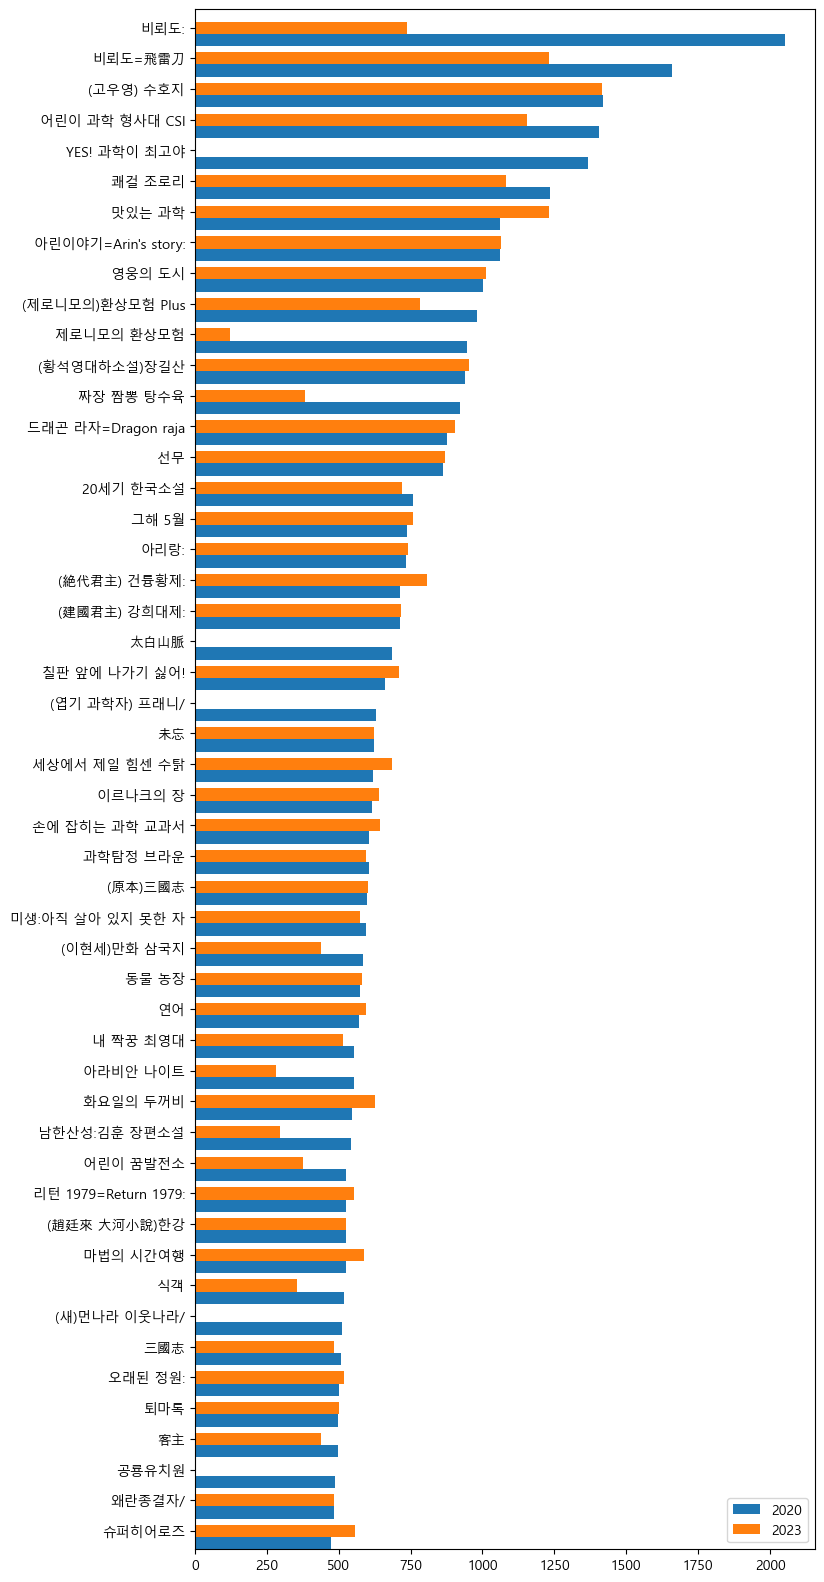

In [92]:
import numpy as np 
import matplotlib.pyplot as plt 

# 2020 대출 상위 50개 도서
df_top50 = df_2020_counts.head(50)

# 2023 대출 도서와 합치기
df_plot = df_top50.merge(df_2023_counts, how='left', on=['도서명','ISBN'], suffixes=('_2020', '_2023'))
df_plot = df_plot.sort_values(by = ['대출건수_2020'], ascending=True)

# 2023 대출 없는 도서는 0으로 변경
df_plot.fillna(0, inplace=True)
print(df_plot)

# Plot 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

ind = np.arange(len(df_top50))
width = 0.4

fig, ax = plt.subplots(figsize=(8, 20))
ax.barh(ind, df_plot['대출건수_2020'], width, label='2020')
ax.barh(ind+width, df_plot['대출건수_2023'], width, label='2023')
ax.set(yticks=ind + width, yticklabels=df_plot['도서명'], ylim=[2*width - 1, len(df_plot)])
ax.legend()

#### 6. 위의 통계를 도출하면서 필요한 전처리 (중복 제거, 누락값 처리, 잘못된 값 처리 등)를 강의 내용을 참고하여 수행

6.1 등록일자
- 2020년에서 2020-01-01 이전 등록건수가 208885<br>
-> 잘못된 값인지 판단하기 어려움 : 유지함

In [277]:
# 등록일자
book_2020_before  = book_2020[book_2020['등록일자'] < '2020-01-01']
print(book_2020_before.shape[0])
print(book_2020_before['등록일자'].value_counts())

book_2023_before  = book_2023[book_2023['등록일자'] < '2023-01-01']
print(book_2023_before.shape[0])
print(book_2023_before['등록일자'].value_counts())

208885
등록일자
1970-01-01    5087
2017-11-23    4823
1999-01-01    3726
2009-06-04    2558
2019-10-21    1486
              ... 
2001-03-13       1
2001-03-16       1
2001-03-27       1
2013-08-17       1
2001-02-14       1
Name: count, Length: 4140, dtype: int64
1479
등록일자
2017-11-23    963
2010-07-22     25
2006-10-10     21
2011-05-20     20
1999-01-01     18
             ... 
2007-12-07      1
2011-05-19      1
2008-08-02      1
2014-10-01      1
2008-04-08      1
Name: count, Length: 99, dtype: int64


6.2 중복값
- 0.1번 과정에서 완료함 

In [94]:

#### 0.1 중복 제거
# dup_check_cols = ['도서명','저자','출판사','발행년도','ISBN','등록일자','대출건수']
# dup_rows_2020 = book_2020.duplicated(subset=dup_check_cols, keep='first')
# print("2020 중복 건수 :", dup_rows_2020.sum())

# dup_rows_2023 = book_2023.duplicated(subset=dup_check_cols, keep='first')
# print("2023 중복 건수 :", dup_rows_2023.sum())

# print('중복제거 전 :')
# print( book_2020.shape )
# print( book_2023.shape )

# book_2020 = book_2020.drop_duplicates(subset=dup_check_cols, keep='first')
# book_2023 = book_2023.drop_duplicates(subset=dup_check_cols, keep='first')

# print('중복제거 후 :')
# print( book_2020.shape )
# print( book_2023.shape )



6.3 데이터병합
- 4번, 5번 과정에서 완료함

In [95]:
# 4번
# 2020년과 2023년 중복 도서명
# df_dup = top100_2020.merge(top100_2023, how='inner', on=['도서명','ISBN'], suffixes=('_2020', '_2023'))

# 5번
# 2023 대출 도서와 합치기
# df_plot = df_top50.merge(df_2023_counts, how='left', on=['도서명','ISBN'], suffixes=('_2020', '_2023'))

6.4 Null값 처리
- 5번 과정에서 완료함

In [97]:
# 2023 대출 없는 도서는 0으로 변경
# df_plot.fillna(0, inplace=True)

#### 7. 위의 통계 외에도 2020년과 2023년을 비교하기에 유의미하다고 여겨지는 분석을 각자 수행하고<br> 그 결과물을 그래프로 표현. 결과에 대한 분석을 코드에 추가 (텍스트, 주석 등)
- 출판사별 도서 현황과 2020년과 2023년 변화량 분석<br>
  . 가장 많이 증가한 출판사는 웅진씽크빅 +623권<br>
  . 가장 많이 감소한 출판사는 문학동네 -423권

(12415, 2)
(13196, 2)
             출판사  count_2020  count_2023     증감  증감_절대값
13251      한국삐아제       356.0       165.0  191.0   191.0
8771          아람       568.0       765.0 -197.0   197.0
7478       삼성출판사       486.0       287.0  199.0   199.0
6317         민음사      2008.0      2212.0 -204.0   204.0
5379    랜덤하우스코리아      1025.0       818.0  207.0   207.0
13339  한국차일드아카데미       476.0       267.0  209.0   209.0
3952          길벗       714.0       937.0 -223.0   223.0
8427         시공사      2442.0      2216.0  226.0   226.0
4744       대한교과서       575.0       313.0  262.0   262.0
10057       웅진닷컴       527.0       259.0  268.0   268.0
3637          교원      1089.0       781.0  308.0   308.0
4514        다산북스      1012.0      1321.0 -309.0   309.0
9699         예림당       915.0       585.0  330.0   330.0
7120         비룡소      1984.0      1639.0  345.0   345.0
10182     위즈덤하우스      1876.0      2231.0 -355.0   355.0
11614         창비      1823.0      2205.0 -382.0   382.0
13477       한솔교육       659

C:\Users\ygkim\AppData\Local\Temp\ipykernel_3464\3915990966.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot.sort_values('증감_절대값', ascending=True, inplace=True)


([<matplotlib.axis.YTick at 0x291cd8beb80>,
 [Text(0, 0, '한국삐아제'),
  Text(0, 1, '아람'),
  Text(0, 2, '삼성출판사'),
  Text(0, 3, '민음사'),
  Text(0, 4, '랜덤하우스코리아'),
  Text(0, 5, '한국차일드아카데미'),
  Text(0, 6, '길벗'),
  Text(0, 7, '시공사'),
  Text(0, 8, '대한교과서'),
  Text(0, 9, '웅진닷컴'),
  Text(0, 10, '교원'),
  Text(0, 11, '다산북스'),
  Text(0, 12, '예림당'),
  Text(0, 13, '비룡소'),
  Text(0, 14, '위즈덤하우스'),
  Text(0, 15, '창비'),
  Text(0, 16, '한솔교육'),
  Text(0, 17, '문학동네'),
  Text(0, 18, '한국헤밍웨이'),
  Text(0, 19, '웅진씽크빅')])

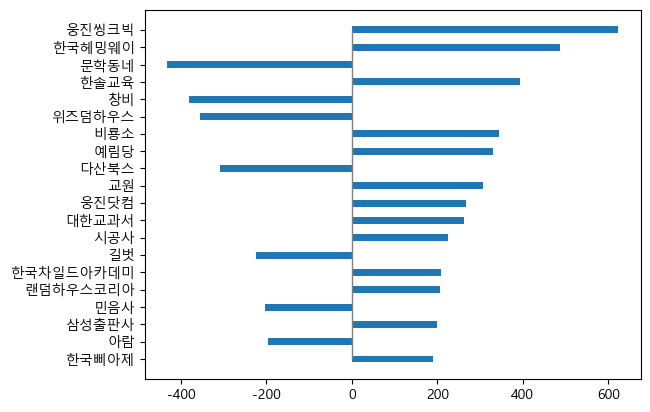

In [130]:
publisher_count_2020 = book_2020['출판사'].value_counts()
publisher_count_2023 = book_2023['출판사'].value_counts()

publisher_2020 = pd.DataFrame(publisher_count_2020)
publisher_2020.sort_values('count', ascending=False, inplace=True)
publisher_2020 = publisher_2020.reset_index()
# print(publisher_2020.head(20))

publisher_2023 = pd.DataFrame(publisher_count_2023)
publisher_2023.sort_values('count', ascending=False, inplace=True)
publisher_2023 = publisher_2023.reset_index()
# print(publisher_2023.head(20))


df_publisher = publisher_2020.merge(publisher_2023, how='outer', on=['출판사'], suffixes=('_2020', '_2023'))
df_publisher["증감"] = df_publisher['count_2020'] - df_publisher['count_2023'] 
df_publisher["증감_절대값"] = np.abs(df_publisher['증감'])

df_publisher.sort_values('증감_절대값', ascending=False, inplace=True)
df_plot = df_publisher.head(20)
df_plot.sort_values('증감_절대값', ascending=True, inplace=True)
print(df_plot)

# Plot 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

ind = np.arange(len(df_plot))
plt.barh(ind, df_plot['증감'], width, label='2020')
plt.vlines(0, ind.min(), ind.max(), color='gray', linestyle='solid', linewidth=1)
plt.yticks(ind, df_plot['출판사'])